In [1]:
from NeuralNetwork import *
    # ANN, split_dataset
from Perceptron import Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [3]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

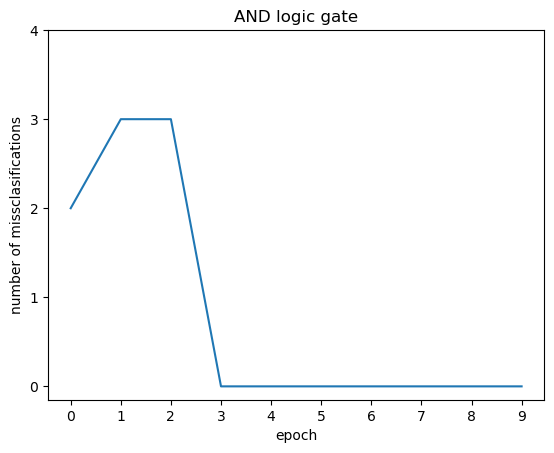

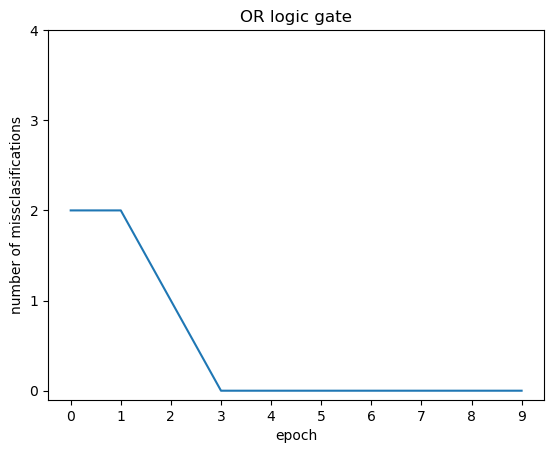

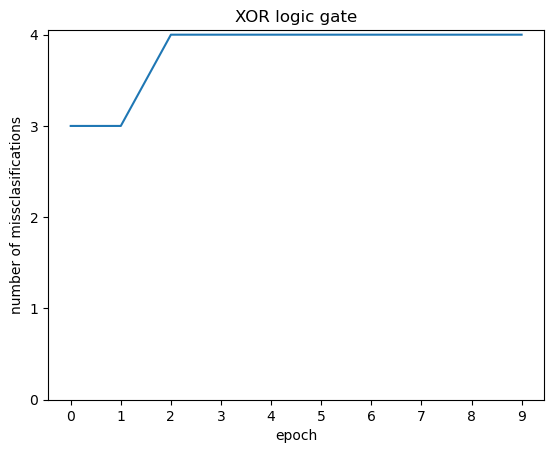

In [4]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [5]:
#load the data into numpy arrays

def vectorize_target(y, num_classes):
    """
    Local function to vectorize a specific target
    :param y: target to vectorize
    :return: vectorized target
    """
    v_y = np.zeros((num_classes, 1))
    v_y[y - 1] = 1.0
    return v_y

with open("../data/features.txt") as file:
    features = [np.array(list(map(float, line.strip('/n').split(',')))).reshape((10, 1)) for line in file]

with open("../data/targets.txt") as file:
    targets = [vectorize_target(int(line.rstrip('\n')), 7) for line in file]

with open("../data/unknown.txt") as file:
    unknown = [np.array(list(map(float, line.strip('/n').split(',')))).reshape((10, 1)) for line in file]


In [6]:
# split the data into train, test data 
train_data, test_data = split_dataset(features, targets, 0.2)
# train_data, validation_data = split_dataset(train_data[0], train_data[1], 0.2)

In [7]:
# # Create the network with one hidden layer
#     network = Network([10, 30, 7])
#     # set to the data to which we are learning to 'data' because we are testing
#     # it on the unknown dataset and start training
#     network.train(training_data, 35, 20, 0.07, validation_data)

#     accuracy = network.evaluate(test_data)
#     print(f"accuracy= {accuracy}")


In [8]:
# initialize the network with 10 features, 30 neurons in the hidden layer, 7 neurons in the output layer, learning rate of 0.15, squared loss function, batch size of 64
ann = ANN([10, 30, 7], lr = 0.09, loss_function="square", number_of_features = 10, batch_size=64)



In [9]:
# fit the network to the data with 35 epochs
# baches of 20, learning rate of 0.07
ann.fit(features, targets, 10)


Epoch  1  done.
Score (accuracy) for this epoch =  0.22547770700636943
Epoch  2  done.
Score (accuracy) for this epoch =  0.32611464968152865
Epoch  3  done.
Score (accuracy) for this epoch =  0.4662420382165605
Epoch  4  done.
Score (accuracy) for this epoch =  0.6114649681528662
Epoch  5  done.
Score (accuracy) for this epoch =  0.6636942675159235
Epoch  6  done.
Score (accuracy) for this epoch =  0.79171974522293
Epoch  7  done.
Score (accuracy) for this epoch =  0.8394904458598726
Epoch  8  done.
Score (accuracy) for this epoch =  0.8343949044585988
Epoch  9  done.
Score (accuracy) for this epoch =  0.878343949044586
Epoch  10  done.
Score (accuracy) for this epoch =  0.9006369426751593


In [10]:
# evaluate the accuracy of the network on the test data

all = len(test_data)
corr = 0
for x, y in test_data:
    output = ann.forward_propagate(x)
    corr = corr + 1 if np.argmax(output) == np.argmax(y) else corr
accuracy = corr / all

print(f"accuracy= {accuracy}")


accuracy= 0.902547770700637


In [12]:
# 1.5 EVALUATION
eval_train, eval_test, eval_val = train_test_val_split(features, targets, 0.7, 0.2)
eval_model = ANN([10, 30, 7], lr = 0.15, loss_function="square", number_of_features = 10, batch_size=64)
eval_model.only_fit(eval_train, 20, eval_val)
print('accuracy on test set: ', eval_model.score(eval_test))
print("accuracy on the validation set: ", eval_model.epoch_score[0][-1])



accuracy on test set:  0.9331210191082803
accuracy on the validation set:  0.9199491740787802


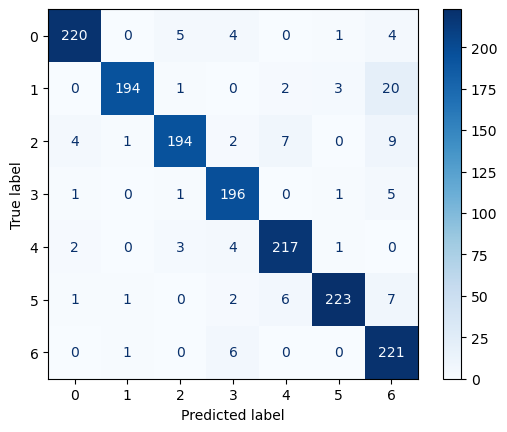

In [16]:
# predictions, y_true = eval_model.predict_on_known_data(eval_test)
# from sklearn import metrics
# cm = metrics.confusion_matrix(y_true, predictions)
# disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6], )
# disp.plot(cmap=plt.cm.Blues, values_format='g')
# plt.show()

Epoch  1  done.
Score (accuracy) for this epoch =  0.256687898089172
Epoch  2  done.
Score (accuracy) for this epoch =  0.3821656050955414
Epoch  3  done.
Score (accuracy) for this epoch =  0.6375796178343949
Epoch  4  done.
Score (accuracy) for this epoch =  0.8197452229299363
Epoch  5  done.
Score (accuracy) for this epoch =  0.802547770700637
Epoch  6  done.
Score (accuracy) for this epoch =  0.8611464968152867
Epoch  7  done.
Score (accuracy) for this epoch =  0.8872611464968153
Epoch  8  done.
Score (accuracy) for this epoch =  0.9146496815286624
Epoch  9  done.
Score (accuracy) for this epoch =  0.89171974522293
Epoch  10  done.
Score (accuracy) for this epoch =  0.8828025477707007
Epoch  1  done.
Score (accuracy) for this epoch =  0.5624203821656051
Epoch  2  done.
Score (accuracy) for this epoch =  0.8197452229299363
Epoch  3  done.
Score (accuracy) for this epoch =  0.8089171974522293
Epoch  4  done.
Score (accuracy) for this epoch =  0.8777070063694268
Epoch  5  done.
Score (

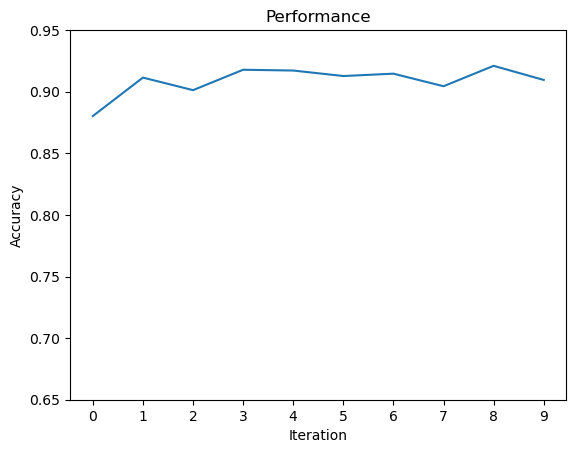

In [12]:
# 1.3 TRAINING
# Question 1.3.10
# Train your network 10 times, each with different initial weights. How does the initialization impact the performance? Plot your results.
accuracies = []
for i in range(10):
   ann = ANN([10, 30, 7], lr = 0.15, loss_function="square", number_of_features = 10, random_state=i, batch_size=64)
   ann.fit(features, targets, 10)
   accuracies.append(ann.score(test_data))
print(accuracies)
plt.plot(accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.title("Performance")
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0.65, 1.0, 0.05))
plt.show()


In [13]:
#generate predictions for the unknown data and save them to a file called 47_classes.txt coma separated in the data folder

predictions = []
for x in unknown:
    output = ann.forward_propagate(x)
    predictions.append(np.argmax(output))
    
with open("../data/47_classes.txt", "w") as file:
    for prediction in predictions:
        file.write(str(prediction) + ",")
    file.write(str(predictions[-1]))


In [17]:
kscore_7neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 7, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)
kscore_16neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 16, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)
kscore_30neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 30, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)

cross-validation  1  /  4  step
 -  1  /  10  iterations.
Score:  0.6286296484971982
 -  2  /  10  iterations.
Score:  0.7457972491085074
 -  3  /  10  iterations.
Score:  0.5313295975547632
 -  4  /  10  iterations.
Score:  0.8329088130412634
 -  5  /  10  iterations.
Score:  0.7045338767193072
 -  6  /  10  iterations.
Score:  0.38206826286296486
 -  7  /  10  iterations.
Score:  0.8828323993886907
 -  8  /  10  iterations.
Score:  0.5333672949566989
 -  9  /  10  iterations.
Score:  0.4192562404482934
 -  10  /  10  iterations.
Score:  0.6821192052980133
cross-validation  2  /  4  step
 -  1  /  10  iterations.
Score:  0.7682119205298014
 -  2  /  10  iterations.
Score:  0.48853795211411105
 -  3  /  10  iterations.
Score:  0.8955680081507896
 -  4  /  10  iterations.
Score:  0.7116658176260825
 -  5  /  10  iterations.
Score:  0.7692307692307693
 -  6  /  10  iterations.
Score:  0.7692307692307693
 -  7  /  10  iterations.
Score:  0.5598573611818645
 -  8  /  10  iterations.
Score:

In [18]:
print("Scores with 7 neurons: ", kscore_7neurons)
print("Scores with 16 neurons: ", kscore_16neurons)
print("Scores with 30 neurons: ", kscore_30neurons)
scores = [kscore_7neurons, kscore_16neurons, kscore_30neurons]
neurons = ["7", "16", "30"]
cross_validation_score = []
for x in scores:
    temp = []
    for tab in x:
        avg1 = np.mean(tab)
        temp.append(avg1)
    cross_validation_score.append(np.mean(temp))
print("---")
print(cross_validation_score)

Scores with 7 neurons:  [[0.6286296484971982, 0.7457972491085074, 0.5313295975547632, 0.8329088130412634, 0.7045338767193072, 0.38206826286296486, 0.8828323993886907, 0.5333672949566989, 0.4192562404482934, 0.6821192052980133], [0.7682119205298014, 0.48853795211411105, 0.8955680081507896, 0.7116658176260825, 0.7692307692307693, 0.7692307692307693, 0.5598573611818645, 0.2022414671421294, 0.7916454406520632, 0.7539480387162506], [0.6856851757514009, 0.8512480896586857, 0.651553744268976, 0.804890473764646, 0.8110035659704534, 0.5282730514518594, 0.5038206826286297, 0.6352521650534896, 0.5766683647478349, 0.7407030056036679], [0.804890473764646, 0.608762098828324, 0.7941925624044829, 0.5950076413652573, 0.7218543046357616, 0.4854814060112073, 0.6128374936321956, 0.6133469179826796, 0.6688741721854304, 0.869077941925624]]
Scores with 16 neurons:  [[0.912888436067244, 0.8960774325012736, 0.8334182373917474, 0.912888436067244, 0.913397860417728, 0.7157412124299541, 0.9123790117167601, 0.9200

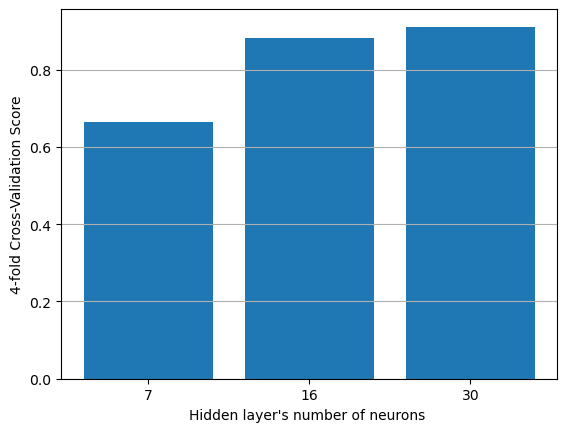

In [19]:
plt.bar(neurons, cross_validation_score)
plt.ylabel("4-fold Cross-Validation Score")
plt.xlabel("Hidden layer's number of neurons ")
plt.grid(axis = 'y')
plt.show()

In [20]:
# split the data into train, test and val data
train_data, test_data = split_dataset(features, targets, 0.2)
# train_data, validation_data = split_dataset(train_data[0], train_data[1], 0.2)

best_model = ANN([10, 30, 7], lr = 0.13, loss_function="square", number_of_features = 10, batch_size=64)

best_model.fit_train_val(train_data, test_data, 30)
val_score_by_epoch = best_model.epoch_score[0]
train_score_by_epoch = best_model.epoch_score[1]
epochs = np.arange(31)[1:]

Epoch  1  done.
Score (accuracy) for this epoch on train:  0.4944302991725016 , on validation:  0.49936305732484076
Epoch  2  done.
Score (accuracy) for this epoch on train:  0.522756206238065 , on validation:  0.5229299363057325
Epoch  3  done.
Score (accuracy) for this epoch on train:  0.6987587523870147 , on validation:  0.7038216560509554
Epoch  4  done.
Score (accuracy) for this epoch on train:  0.8658497772119669 , on validation:  0.8598726114649682
Epoch  5  done.
Score (accuracy) for this epoch on train:  0.8411839592616168 , on validation:  0.8407643312101911
Epoch  6  done.
Score (accuracy) for this epoch on train:  0.8540738383195416 , on validation:  0.8611464968152867
Epoch  7  done.
Score (accuracy) for this epoch on train:  0.8946530872056015 , on validation:  0.8872611464968153
Epoch  8  done.
Score (accuracy) for this epoch on train:  0.8957670273711013 , on validation:  0.8942675159235669
Epoch  9  done.
Score (accuracy) for this epoch on train:  0.90515595162317 , on

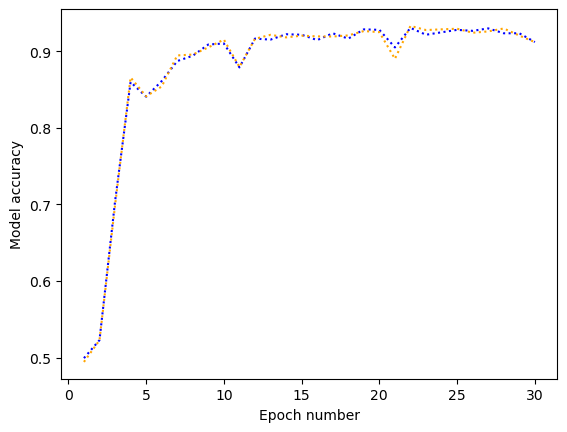

In [21]:
plt.plot(epochs, val_score_by_epoch, c="blue", ls=":")
plt.plot(epochs, train_score_by_epoch, c="orange", ls=":")
plt.xlabel("Epoch number")
plt.ylabel("Model accuracy")
plt.show()